In [1]:
import os
print(os.listdir('C:\\Users\\DELL\\Desktop\\flowers'))

['daisy', 'dandelion', 'flowers.ipynb', 'rose', 'sunflower', 'tulip']


In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from keras import backend as K
from keras.models import Sequential # type: ignore
from keras.layers import Dense # type: ignore
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop # type: ignore
from keras.utils import to_categorical # type: ignore
from keras.layers import Dropout, Flatten,Activation # type: ignore
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization # type: ignore
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:\\Users\\DELL\\Desktop\\flowers\\daisy'
FLOWER_SUNFLOWER_DIR='C:\\Users\\DELL\\Desktop\\flowers\\sunflower'
FLOWER_TULIP_DIR='C:\\Users\\DELL\\Desktop\\flowers\\tulip'
FLOWER_DANDI_DIR='C:\\Users\\DELL\Desktop\\flowers\\dandelion'
FLOWER_ROSE_DIR='C:\\Users\\DELL\\Desktop\\flowers\\rose'

In [4]:
def assign_label(img,flower_type):
    return flower_type
    

In [ ]:
#Preprocess the model

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [6]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:02<00:00, 279.91it/s]

764


In [7]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:03<00:00, 229.12it/s]

1497


In [8]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:03<00:00, 271.35it/s]

2481


In [9]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:04<00:00, 229.47it/s]

3533


In [10]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:04<00:00, 193.25it/s]

4317


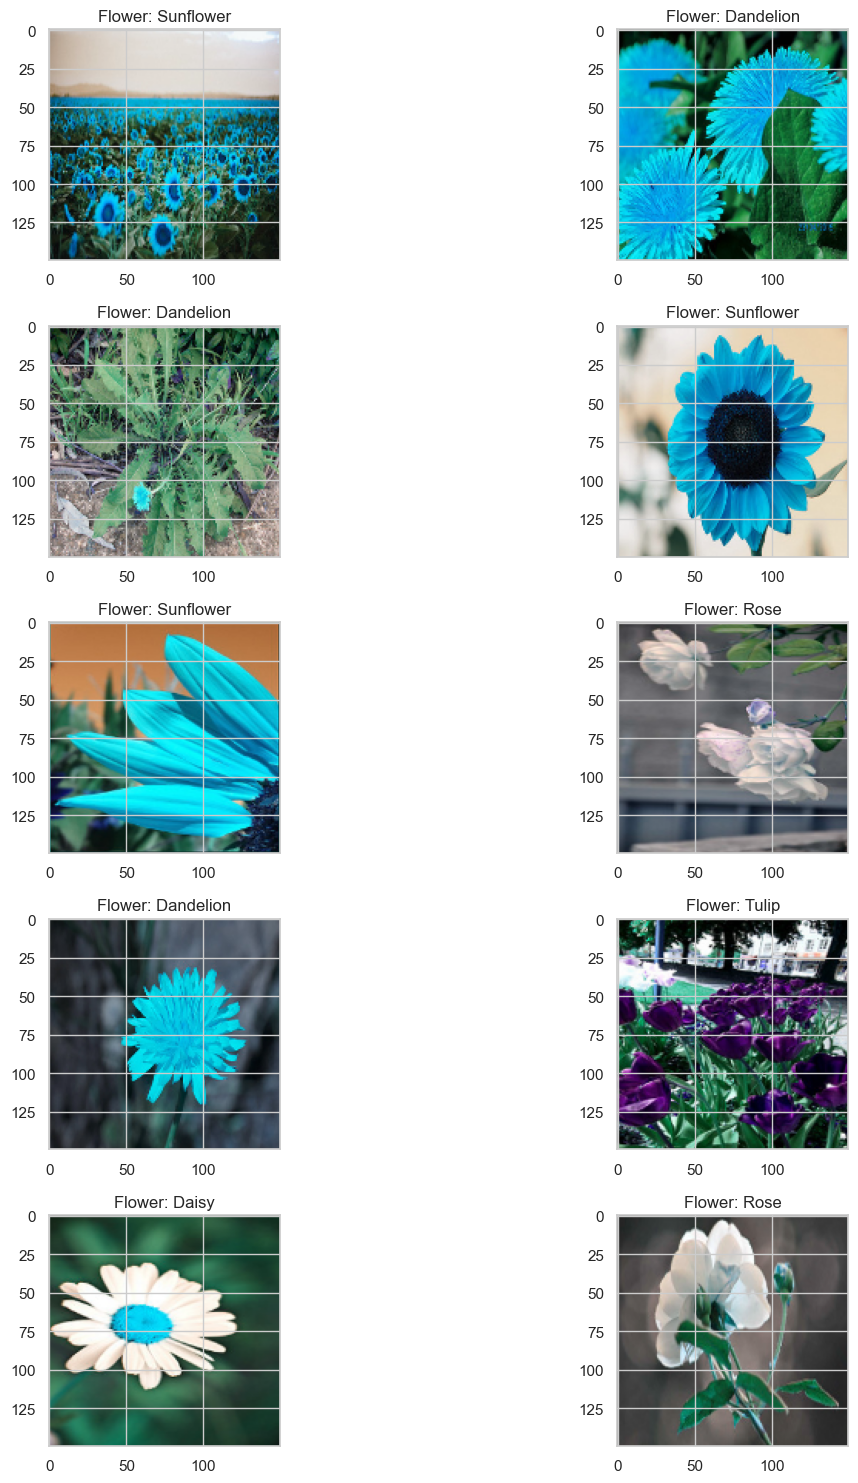

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
# modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [15]:
#Using a LR Annealer
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [16]:
#Data Augmentation to prevent Overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(x_train)

In [17]:

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy']) # type: ignore
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Fitting on the Training set and making predcitons on the Validation set

History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.2593 - loss: 1.7973 - val_accuracy: 0.4231 - val_loss: 1.3137
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - accuracy: 0.3906 - loss: 1.3661 - val_accuracy: 0.3704 - val_loss: 1.3864
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4254 - loss: 1.3350 - val_accuracy: 0.5157 - val_loss: 1.1900
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.3514 - loss: 1.2935 - val_accuracy: 0.5435 - val_loss: 1.1701
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5067 - loss: 1.1962 - val_accuracy: 0.5944 - val_loss: 1.0043
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - accuracy: 0.5547 - loss: 1.1116 - val_accuracy: 0.6046 - val_loss: 1.0007
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5765 - loss: 1.0684 - val_accuracy: 0.6315 - val_loss: 0.9305
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - accuracy: 0.6719 - loss: 0.9665 - val_accuracy: 0.6370 - 

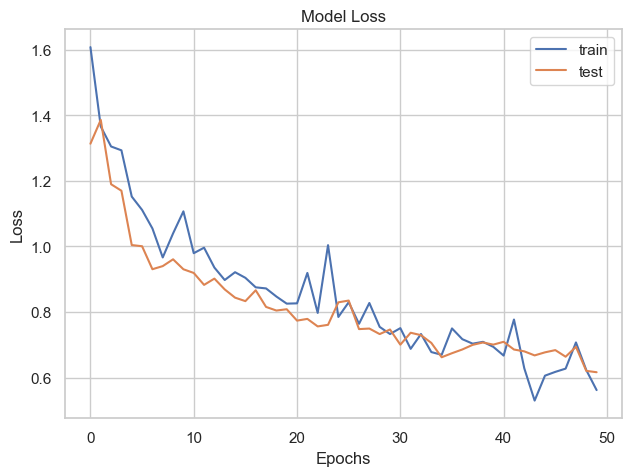

In [19]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


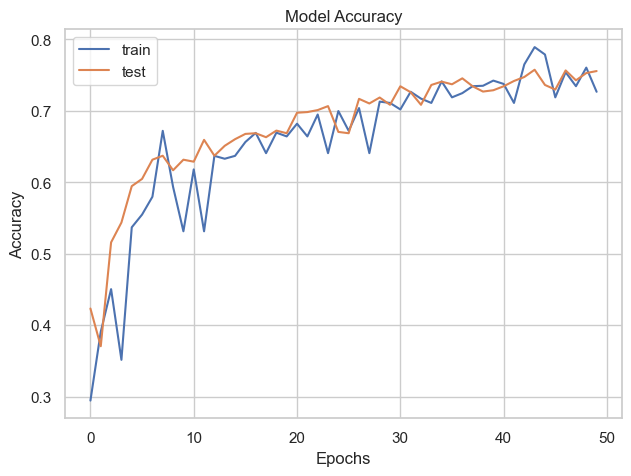

In [20]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()